In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
file_path = '/content/drive/MyDrive/BDM Capstone/Processed Raw data/Employee Survey - Sheet1.csv'
employee = pd.read_csv(file_path)

# Display basic information about the dataset
employee.head()


,name,position,age,gender,Qualification,Relative,Wages/Salery,Satisfaction with current role (1-5),"Adequate Information about company's goal (0-No, 1-Yes)",Skill Utilization(1-5),value of ideation(1-5),Work Enviromenet comfortability(1-5),"Oppertunity for professional growth (0-No, 1-Yes)",Employe well being,"Want to continue working (0-No, 1-Yes)",Employee Score,Reliable
0,Lily,rafu and fabric cheaker,31,F,10th,No,12000,3,0,5,1,4,0,None,1,51.428571,True
1,Ashok,loom operator,45,M,10th,Yes,15000,5,0,4,1,4,0,None,1,54.285714,True
2,Kush,Management,23,M,Graduated,No,17000,4,0,1,1,3,0,None,0,25.714286,False
3,Luv,loom operator,25,M,10th,No,15000,2,0,3,2,5,0,None,0,34.285714,False
4,Anuj,loom operator,26,M,10th,No,15000,3,0,5,2,3,0,None,1,51.428571,True


<ipython-input-23-1e88e6792d76>:16: MatplotlibDeprecationWarning:

Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.



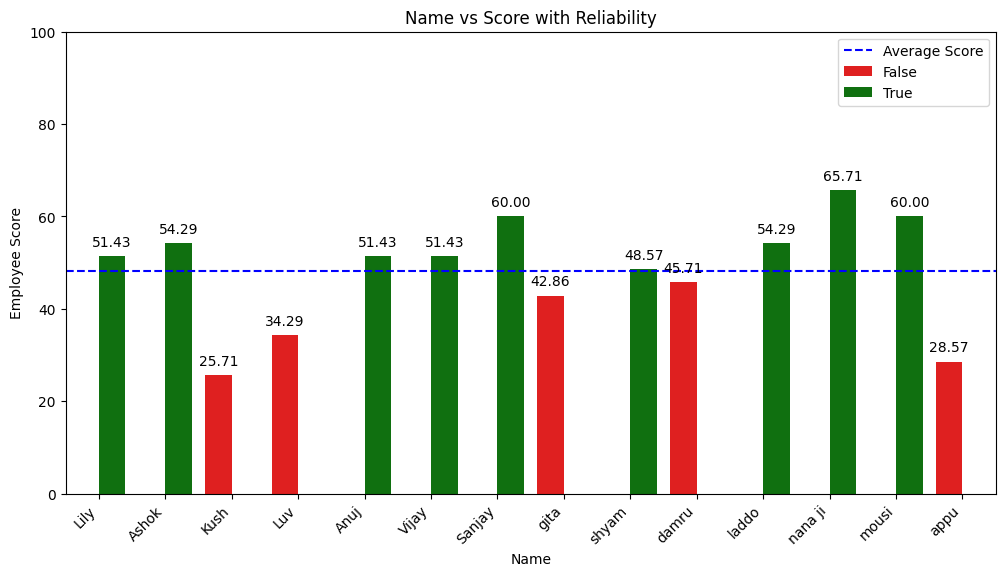

In [23]:
# Define the order of names for the x-axis
name_order = employee['name'].unique()

# Visualize Name vs Score with color-coded reliability using a bar chart
plt.figure(figsize=(12, 6))
ax= sns.barplot(x='name', y='Employee Score', hue='Reliable', data=employee,
            palette={True: 'green', False: 'red'}, order=name_order)
plt.axhline(y=employee['Employee Score'].mean(), color='blue', linestyle='--', label='Average Score')


# Annotate each bar with its score
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Set y-axis limits
plt.ylim(0, 100, 20)
plt.title('Name vs Score with Reliability')
plt.xlabel('Name')
plt.ylabel('Employee Score')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

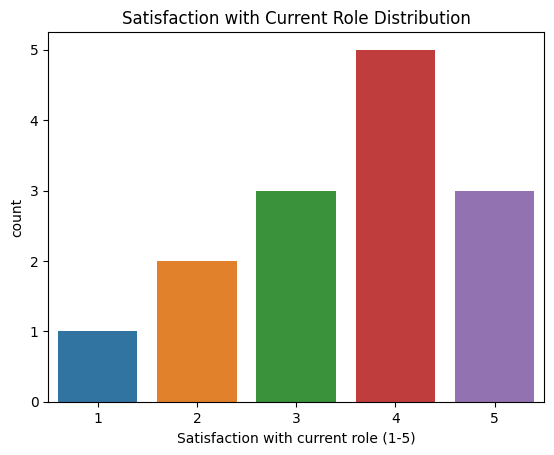

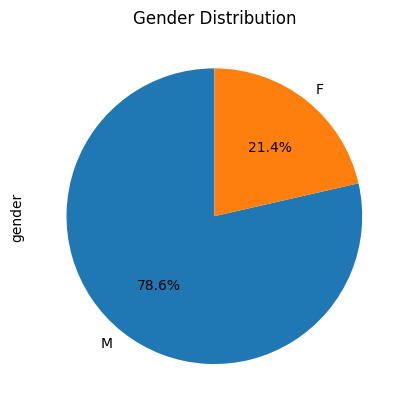

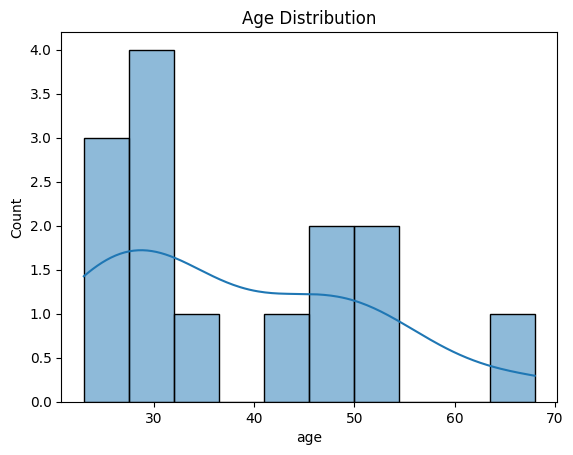

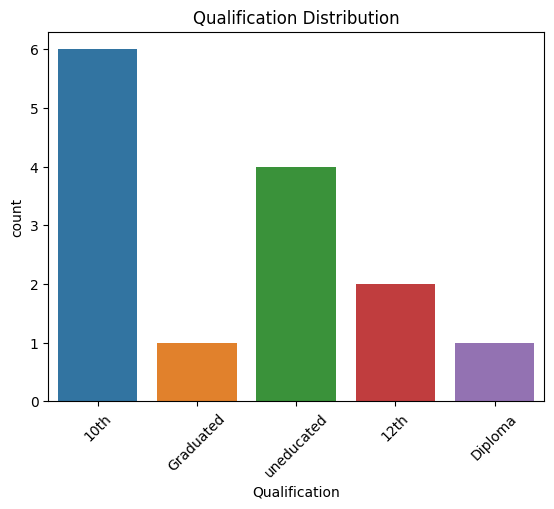

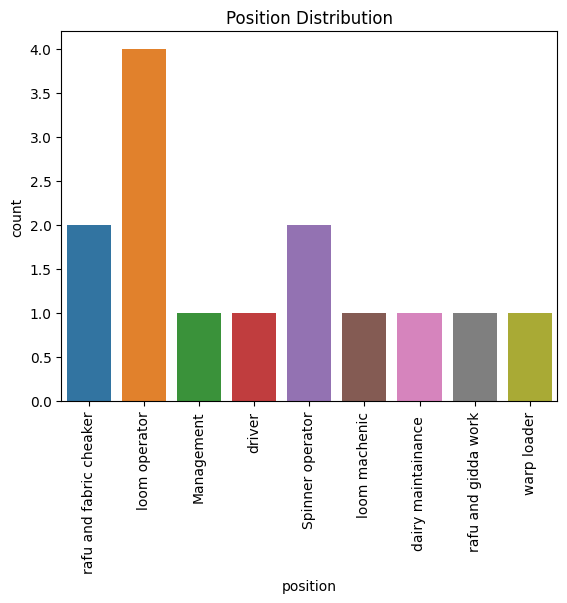

In [25]:
# Sentiment and Satisfaction Analysis
# Create a bar plot for Satisfaction with current role
sns.countplot(x='Satisfaction with current role (1-5)', data=employee)
plt.title('Satisfaction with Current Role Distribution')
plt.show()

# Employee Diversity Analysis
# Create a pie chart for gender distribution
gender_distribution = employee['gender'].value_counts()
gender_distribution.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

# Create a bar plot for age distribution
sns.histplot(x='age', data=employee, bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

# Create a bar plot for Qualification distribution
sns.countplot(x='Qualification', data=employee)
plt.title('Qualification Distribution')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot for Position distribution
sns.countplot(x='position', data=employee)
plt.title('Position Distribution')
plt.xticks(rotation=90)
plt.show()

<ipython-input-34-b9dbc42a01bd>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



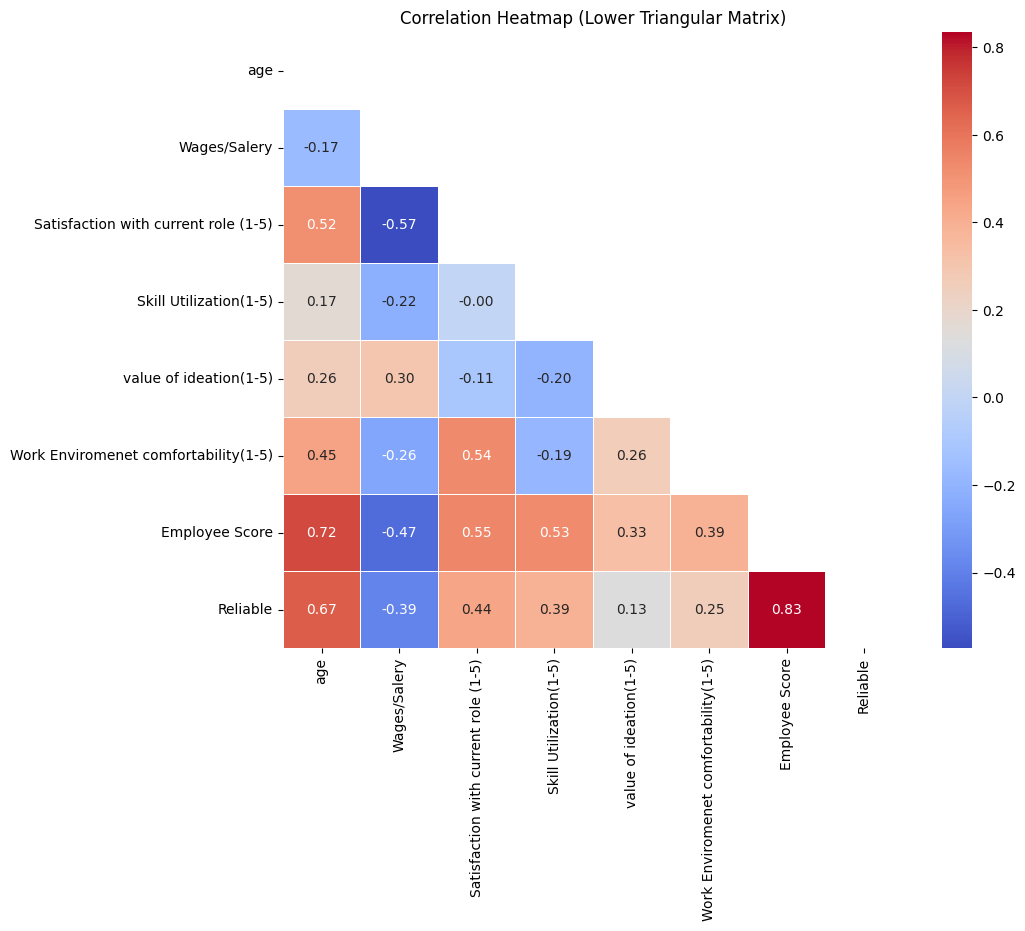

In [34]:
import numpy as np
# Remove 'Yes/No' type columns
columns_to_exclude = ['Oppertunity for professional growth (0-No, 1-Yes)', 'Want to continue working  (0-No, 1-Yes)', "Adequate Information about company's goal (0-No, 1-Yes)"]
employee_numeric = employee.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
correlation_matrix = employee_numeric.corr()

# Create a mask for the lower triangular matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap (Lower Triangular Matrix)')
plt.show()

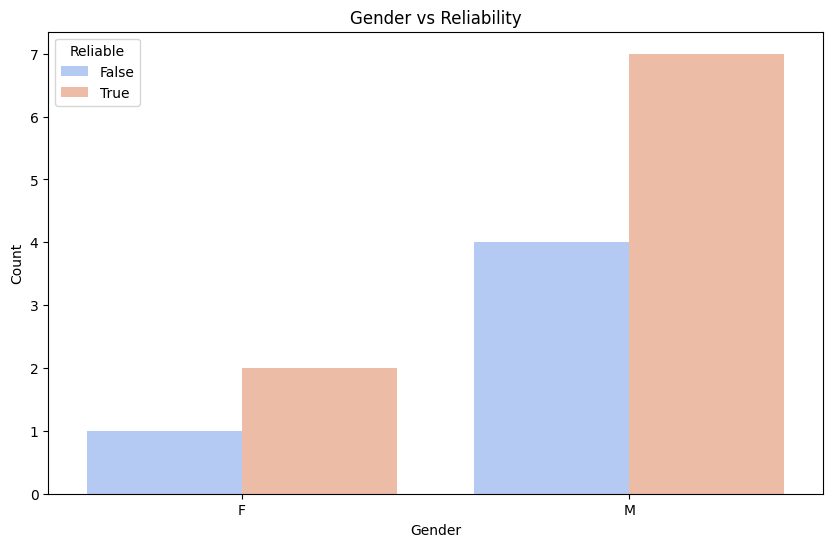

In [38]:
# Count plot for Gender vs Reliability
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Reliable', data=employee, palette='coolwarm')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Reliability')

# Show the plot
plt.show()

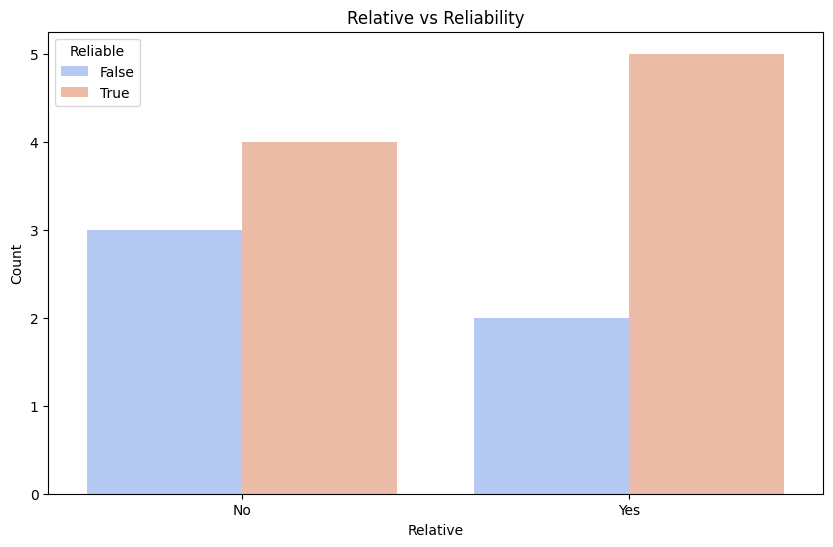

In [40]:
# Count plot for Relative vs Reliability
plt.figure(figsize=(10, 6))
sns.countplot(x='Relative', hue='Reliable', data=employee, palette='coolwarm')

# Adding labels and title
plt.xlabel('Relative')
plt.ylabel('Count')
plt.title('Relative vs Reliability')

# Show the plot
plt.show()